In [2]:
import pandas as pd
import numpy as np
from tensorflow.keras import layers, models


2023-03-20 19:27:00.811746: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-20 19:27:00.974732: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-20 19:27:00.974765: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-20 19:27:01.009483: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-03-20 19:27:01.755311: W tensorflow/stream_executor/platform/de

In [40]:
def get_two_layers_nnet():
    """ prepare two layers neural net """
    model = models.Sequential()
    model.add(layers.Dense(54, activation="tanh", input_shape=(54,)))
    model.add(layers.Dropout(0.1))
    #model.add(layers.Dense(12, activation="tanh"))
    model.add(layers.Dense(1))
    model.compile(optimizer="adam", loss="mse", metrics=["mae"])
    return model



In [41]:
def prepare_data(csv_file="../data/sunspot_numbers.csv",
                 lag_start=1,
                 lag_end=48):
    """ """
    data = pd.read_csv(csv_file, delimiter=";")
    fields = []
    # lags of series
    for i in range(lag_start, (lag_end + 1)):
        data[f"lag_{i}"] = data.sunspots.shift(i).fillna(0.)
        fields.append(f"lag_{i}")
    final_lag = 12
    for i in range(64, 385, 64):
        data[f"lag_{i}"] = data.sunspots.shift(i).fillna(0.)
        fields.append(f"lag_{i}")
    print(len(fields))
    return data, fields


In [42]:
df, lags = prepare_data(csv_file="../data/sunspot_numbers.csv")
model = get_two_layers_nnet()

np.random.seed(212)

n = len(df["sunspots"].values)
nums = np.array(np.arange(n))
np.random.shuffle(nums)
rands = nums[72:].tolist()
X = df[lags].values[rands]
y = df["sunspots"].values[rands]
X_test = df[lags].values[nums[:72]]
y_test = df["sunspots"].values[nums[:72]]
mean = df[lags].values.mean(axis=0)
std = df[lags].values.std(axis=0)
X = (X - mean) / std
X_test = (X_test - mean) / std

history = model.fit(X, y, epochs = 800, batch_size = 64,
                    validation_data=(X_test, y_test))

54
Epoch 1/800
51/51 [==============================] - 1s 5ms/step - loss: 10923.4287 - mae: 81.7263 - val_loss: 10645.4199 - val_mae: 80.2780
Epoch 2/800
51/51 [==============================] - 0s 3ms/step - loss: 10500.9941 - mae: 81.9350 - val_loss: 10323.8711 - val_mae: 80.5381
Epoch 3/800
51/51 [==============================] - 0s 3ms/step - loss: 10211.3613 - mae: 81.7903 - val_loss: 10075.0850 - val_mae: 80.4538
Epoch 4/800
51/51 [==============================] - 0s 3ms/step - loss: 9926.5977 - mae: 81.1158 - val_loss: 9803.2227 - val_mae: 79.8396
Epoch 5/800
51/51 [==============================] - 0s 3ms/step - loss: 9607.9375 - mae: 79.9120 - val_loss: 9499.5811 - val_mae: 78.6295
Epoch 6/800
51/51 [==============================] - 0s 3ms/step - loss: 9246.2217 - mae: 78.1335 - val_loss: 9155.5088 - val_mae: 77.1343
Epoch 7/800
51/51 [==============================] - 0s 3ms/step - loss: 8839.6104 - mae: 75.9981 - val_loss: 8766.8594 - val_mae: 74.8196
Epoch 8/800
51/51 

Epoch 118/800
51/51 [==============================] - 0s 3ms/step - loss: 712.2096 - mae: 18.6220 - val_loss: 932.7396 - val_mae: 20.7596
Epoch 119/800
51/51 [==============================] - 0s 3ms/step - loss: 706.5854 - mae: 18.6283 - val_loss: 916.7702 - val_mae: 20.4954
Epoch 120/800
51/51 [==============================] - 0s 3ms/step - loss: 703.7914 - mae: 18.4854 - val_loss: 918.5145 - val_mae: 20.6834
Epoch 121/800
51/51 [==============================] - 0s 3ms/step - loss: 695.2038 - mae: 18.7140 - val_loss: 927.3072 - val_mae: 20.7567
Epoch 122/800
51/51 [==============================] - 0s 3ms/step - loss: 683.5720 - mae: 18.2959 - val_loss: 924.5280 - val_mae: 20.7973
Epoch 123/800
51/51 [==============================] - 0s 3ms/step - loss: 671.5389 - mae: 18.3774 - val_loss: 912.2638 - val_mae: 20.6424
Epoch 124/800
51/51 [==============================] - 0s 3ms/step - loss: 690.1331 - mae: 18.5697 - val_loss: 913.0242 - val_mae: 20.6844
Epoch 125/800
51/51 [======

Epoch 177/800
51/51 [==============================] - 0s 3ms/step - loss: 559.8822 - mae: 17.1015 - val_loss: 811.5410 - val_mae: 20.2572
Epoch 178/800
51/51 [==============================] - 0s 3ms/step - loss: 569.8635 - mae: 17.3320 - val_loss: 813.3624 - val_mae: 20.1522
Epoch 179/800
51/51 [==============================] - 0s 3ms/step - loss: 560.4125 - mae: 17.1813 - val_loss: 813.0733 - val_mae: 20.3080
Epoch 180/800
51/51 [==============================] - 0s 3ms/step - loss: 573.5948 - mae: 17.3722 - val_loss: 813.2186 - val_mae: 20.2922
Epoch 181/800
51/51 [==============================] - 0s 3ms/step - loss: 571.2623 - mae: 17.2745 - val_loss: 800.3594 - val_mae: 20.1667
Epoch 182/800
51/51 [==============================] - 0s 3ms/step - loss: 551.8064 - mae: 17.1322 - val_loss: 799.5925 - val_mae: 20.1182
Epoch 183/800
51/51 [==============================] - 0s 3ms/step - loss: 566.6788 - mae: 17.2353 - val_loss: 807.2222 - val_mae: 20.3213
Epoch 184/800
51/51 [======

Epoch 236/800
51/51 [==============================] - 0s 3ms/step - loss: 506.7988 - mae: 16.3836 - val_loss: 775.4932 - val_mae: 19.9074
Epoch 237/800
51/51 [==============================] - 0s 3ms/step - loss: 513.8992 - mae: 16.5672 - val_loss: 813.1230 - val_mae: 20.7935
Epoch 238/800
51/51 [==============================] - 0s 3ms/step - loss: 517.4482 - mae: 16.5623 - val_loss: 784.9643 - val_mae: 19.9973
Epoch 239/800
51/51 [==============================] - 0s 3ms/step - loss: 511.2140 - mae: 16.6544 - val_loss: 796.3253 - val_mae: 20.3307
Epoch 240/800
51/51 [==============================] - 0s 3ms/step - loss: 512.3231 - mae: 16.6167 - val_loss: 799.9294 - val_mae: 20.2649
Epoch 241/800
51/51 [==============================] - 0s 3ms/step - loss: 516.5214 - mae: 16.6118 - val_loss: 786.6771 - val_mae: 20.0166
Epoch 242/800
51/51 [==============================] - 0s 3ms/step - loss: 509.7386 - mae: 16.2177 - val_loss: 778.2429 - val_mae: 20.0461
Epoch 243/800
51/51 [======

Epoch 295/800
51/51 [==============================] - 0s 3ms/step - loss: 493.6659 - mae: 16.3147 - val_loss: 781.5687 - val_mae: 19.9144
Epoch 296/800
51/51 [==============================] - 0s 3ms/step - loss: 485.5304 - mae: 16.1880 - val_loss: 759.2067 - val_mae: 19.6000
Epoch 297/800
51/51 [==============================] - 0s 3ms/step - loss: 498.4287 - mae: 16.4601 - val_loss: 766.0469 - val_mae: 19.8478
Epoch 298/800
51/51 [==============================] - 0s 3ms/step - loss: 489.9688 - mae: 16.4614 - val_loss: 773.9282 - val_mae: 19.7247
Epoch 299/800
51/51 [==============================] - 0s 3ms/step - loss: 493.2297 - mae: 16.2874 - val_loss: 791.9975 - val_mae: 20.1826
Epoch 300/800
51/51 [==============================] - 0s 3ms/step - loss: 487.2724 - mae: 16.2131 - val_loss: 773.8046 - val_mae: 19.7772
Epoch 301/800
51/51 [==============================] - 0s 3ms/step - loss: 482.7024 - mae: 16.1100 - val_loss: 785.0995 - val_mae: 19.8850
Epoch 302/800
51/51 [======

Epoch 354/800
51/51 [==============================] - 0s 3ms/step - loss: 472.2158 - mae: 16.1437 - val_loss: 784.5661 - val_mae: 20.0351
Epoch 355/800
51/51 [==============================] - 0s 3ms/step - loss: 468.2640 - mae: 16.1015 - val_loss: 778.5709 - val_mae: 19.8771
Epoch 356/800
51/51 [==============================] - 0s 3ms/step - loss: 471.7666 - mae: 15.9749 - val_loss: 770.4127 - val_mae: 19.9825
Epoch 357/800
51/51 [==============================] - 0s 3ms/step - loss: 461.7556 - mae: 15.7958 - val_loss: 776.2797 - val_mae: 20.0409
Epoch 358/800
51/51 [==============================] - 0s 3ms/step - loss: 471.6580 - mae: 16.0024 - val_loss: 773.5960 - val_mae: 19.8827
Epoch 359/800
51/51 [==============================] - 0s 3ms/step - loss: 474.0536 - mae: 16.1378 - val_loss: 783.2740 - val_mae: 20.2189
Epoch 360/800
51/51 [==============================] - 0s 3ms/step - loss: 468.1367 - mae: 15.9985 - val_loss: 791.0855 - val_mae: 20.1719
Epoch 361/800
51/51 [======

Epoch 413/800
51/51 [==============================] - 0s 3ms/step - loss: 443.8897 - mae: 15.6544 - val_loss: 774.6560 - val_mae: 20.0303
Epoch 414/800
51/51 [==============================] - 0s 3ms/step - loss: 451.8413 - mae: 15.7122 - val_loss: 780.7543 - val_mae: 20.0383
Epoch 415/800
51/51 [==============================] - 0s 3ms/step - loss: 453.9742 - mae: 15.7049 - val_loss: 777.7507 - val_mae: 20.1177
Epoch 416/800
51/51 [==============================] - 0s 3ms/step - loss: 437.1336 - mae: 15.4150 - val_loss: 779.2804 - val_mae: 20.1179
Epoch 417/800
51/51 [==============================] - 0s 3ms/step - loss: 448.6235 - mae: 15.7436 - val_loss: 768.4850 - val_mae: 20.1533
Epoch 418/800
51/51 [==============================] - 0s 3ms/step - loss: 437.5365 - mae: 15.4674 - val_loss: 780.7567 - val_mae: 20.1788
Epoch 419/800
51/51 [==============================] - 0s 3ms/step - loss: 443.0324 - mae: 15.5910 - val_loss: 779.9608 - val_mae: 20.1311
Epoch 420/800
51/51 [======

Epoch 472/800
51/51 [==============================] - 0s 3ms/step - loss: 429.6169 - mae: 15.2970 - val_loss: 788.3304 - val_mae: 20.3307
Epoch 473/800
51/51 [==============================] - 0s 3ms/step - loss: 439.7354 - mae: 15.5671 - val_loss: 785.5247 - val_mae: 20.3112
Epoch 474/800
51/51 [==============================] - 0s 3ms/step - loss: 427.6949 - mae: 15.3833 - val_loss: 794.4697 - val_mae: 20.6235
Epoch 475/800
51/51 [==============================] - 0s 3ms/step - loss: 439.8598 - mae: 15.4964 - val_loss: 789.0710 - val_mae: 20.4034
Epoch 476/800
51/51 [==============================] - 0s 3ms/step - loss: 434.8539 - mae: 15.4374 - val_loss: 810.0256 - val_mae: 20.6482
Epoch 477/800
51/51 [==============================] - 0s 3ms/step - loss: 416.2354 - mae: 15.1570 - val_loss: 800.1362 - val_mae: 20.5618
Epoch 478/800
51/51 [==============================] - 0s 3ms/step - loss: 429.8855 - mae: 15.3985 - val_loss: 785.5460 - val_mae: 20.2233
Epoch 479/800
51/51 [======

Epoch 531/800
51/51 [==============================] - 0s 3ms/step - loss: 420.7607 - mae: 15.2143 - val_loss: 807.9709 - val_mae: 20.7785
Epoch 532/800
51/51 [==============================] - 0s 3ms/step - loss: 400.9290 - mae: 14.9499 - val_loss: 792.9323 - val_mae: 20.4490
Epoch 533/800
51/51 [==============================] - 0s 3ms/step - loss: 391.5309 - mae: 14.8211 - val_loss: 802.3355 - val_mae: 20.5976
Epoch 534/800
51/51 [==============================] - 0s 3ms/step - loss: 409.6418 - mae: 15.1613 - val_loss: 788.8512 - val_mae: 20.3871
Epoch 535/800
51/51 [==============================] - 0s 3ms/step - loss: 419.3243 - mae: 15.1450 - val_loss: 793.9146 - val_mae: 20.6315
Epoch 536/800
51/51 [==============================] - 0s 3ms/step - loss: 424.8805 - mae: 15.3259 - val_loss: 794.4330 - val_mae: 20.6944
Epoch 537/800
51/51 [==============================] - 0s 3ms/step - loss: 409.1853 - mae: 15.0961 - val_loss: 790.3508 - val_mae: 20.4911
Epoch 538/800
51/51 [======

Epoch 590/800
51/51 [==============================] - 0s 3ms/step - loss: 400.3326 - mae: 14.9844 - val_loss: 802.5138 - val_mae: 20.6775
Epoch 591/800
51/51 [==============================] - 0s 3ms/step - loss: 408.6702 - mae: 15.0987 - val_loss: 794.1780 - val_mae: 20.4465
Epoch 592/800
51/51 [==============================] - 0s 3ms/step - loss: 395.8492 - mae: 14.7311 - val_loss: 822.1536 - val_mae: 21.0255
Epoch 593/800
51/51 [==============================] - 0s 3ms/step - loss: 407.7991 - mae: 14.9973 - val_loss: 790.1765 - val_mae: 20.5567
Epoch 594/800
51/51 [==============================] - 0s 3ms/step - loss: 393.3373 - mae: 14.8237 - val_loss: 803.2651 - val_mae: 20.6100
Epoch 595/800
51/51 [==============================] - 0s 3ms/step - loss: 405.1998 - mae: 15.0840 - val_loss: 793.5944 - val_mae: 20.4905
Epoch 596/800
51/51 [==============================] - 0s 3ms/step - loss: 391.9037 - mae: 14.7909 - val_loss: 797.4479 - val_mae: 20.7129
Epoch 597/800
51/51 [======

Epoch 649/800
51/51 [==============================] - 0s 3ms/step - loss: 391.6196 - mae: 14.8197 - val_loss: 793.2661 - val_mae: 20.6577
Epoch 650/800
51/51 [==============================] - 0s 3ms/step - loss: 390.5964 - mae: 14.7246 - val_loss: 790.5805 - val_mae: 20.5918
Epoch 651/800
51/51 [==============================] - 0s 3ms/step - loss: 402.9588 - mae: 15.0463 - val_loss: 779.5612 - val_mae: 20.3519
Epoch 652/800
51/51 [==============================] - 0s 3ms/step - loss: 395.7024 - mae: 14.8807 - val_loss: 795.4257 - val_mae: 20.7177
Epoch 653/800
51/51 [==============================] - 0s 3ms/step - loss: 382.5721 - mae: 14.6892 - val_loss: 802.4034 - val_mae: 20.7158
Epoch 654/800
51/51 [==============================] - 0s 3ms/step - loss: 391.3079 - mae: 14.7045 - val_loss: 803.7105 - val_mae: 20.8850
Epoch 655/800
51/51 [==============================] - 0s 3ms/step - loss: 403.8013 - mae: 15.0526 - val_loss: 783.8400 - val_mae: 20.5116
Epoch 656/800
51/51 [======

Epoch 708/800
51/51 [==============================] - 0s 3ms/step - loss: 382.4571 - mae: 14.7050 - val_loss: 780.9548 - val_mae: 20.3644
Epoch 709/800
51/51 [==============================] - 0s 3ms/step - loss: 396.6655 - mae: 14.8243 - val_loss: 773.8181 - val_mae: 20.3672
Epoch 710/800
51/51 [==============================] - 0s 3ms/step - loss: 376.3395 - mae: 14.4678 - val_loss: 785.1764 - val_mae: 20.4877
Epoch 711/800
51/51 [==============================] - 0s 3ms/step - loss: 379.7227 - mae: 14.5960 - val_loss: 808.4733 - val_mae: 21.1107
Epoch 712/800
51/51 [==============================] - 0s 3ms/step - loss: 386.7649 - mae: 14.7025 - val_loss: 791.3937 - val_mae: 20.6218
Epoch 713/800
51/51 [==============================] - 0s 3ms/step - loss: 378.0491 - mae: 14.5330 - val_loss: 789.1165 - val_mae: 20.4740
Epoch 714/800
51/51 [==============================] - 0s 3ms/step - loss: 368.3573 - mae: 14.4621 - val_loss: 804.0774 - val_mae: 20.8103
Epoch 715/800
51/51 [======

Epoch 767/800
51/51 [==============================] - 0s 3ms/step - loss: 384.3888 - mae: 14.6559 - val_loss: 790.4717 - val_mae: 20.6302
Epoch 768/800
51/51 [==============================] - 0s 3ms/step - loss: 390.0840 - mae: 14.8482 - val_loss: 782.3001 - val_mae: 20.4983
Epoch 769/800
51/51 [==============================] - 0s 3ms/step - loss: 365.9827 - mae: 14.3766 - val_loss: 783.5723 - val_mae: 20.5406
Epoch 770/800
51/51 [==============================] - 0s 3ms/step - loss: 360.5739 - mae: 14.2174 - val_loss: 784.2209 - val_mae: 20.5549
Epoch 771/800
51/51 [==============================] - 0s 3ms/step - loss: 370.0864 - mae: 14.3974 - val_loss: 786.0817 - val_mae: 20.5887
Epoch 772/800
51/51 [==============================] - 0s 3ms/step - loss: 367.2207 - mae: 14.3236 - val_loss: 794.8104 - val_mae: 20.6353
Epoch 773/800
51/51 [==============================] - 0s 3ms/step - loss: 370.3203 - mae: 14.4558 - val_loss: 783.3704 - val_mae: 20.5096
Epoch 774/800
51/51 [======

In [44]:
from matplotlib import pyplot as plt
%matplotlib inline

model.evaluate(X_test, y_test)
x_avg = (df[lags].values - mean) / std
predict = model.predict(x_avg)

103/103 [==============================] - 0s 2ms/step


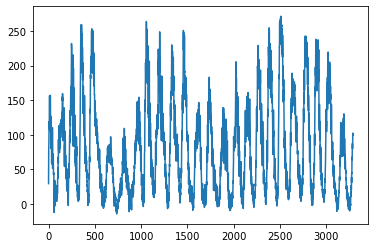

In [45]:
plt.plot(predict)
plt.show()

103/103 [==============================] - 0s 1ms/step


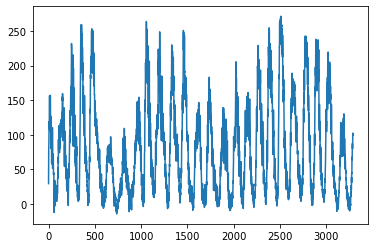

In [46]:
model.evaluate(X_test, y_test)
x_avg = (df[lags].values - mean) / std
predict = model.predict(x_avg)

plt.plot(predict)
plt.show()

In [47]:
model.evaluate(x_avg, df["sunspots"].values)

103/103 [==============================] - 0s 2ms/step - loss: 283.2283 - mae: 12.0064


[283.22833251953125, 12.006357192993164]

In [48]:
model.save("two_layer_dnn.h5")

In [39]:
print(np.max(predict), np.max(df["sunspots"].values))

243.82066 398.2
